In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sea

In [2]:
df = pd.read_csv("hour.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [5]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
df.isnull().values.any()

np.False_

In [7]:
usedDat = df[["season", "temp","mnth","windspeed", "registered", "cnt"]]

There are no missing or NA values so therefore we don't have to deal with removing or imputing any values

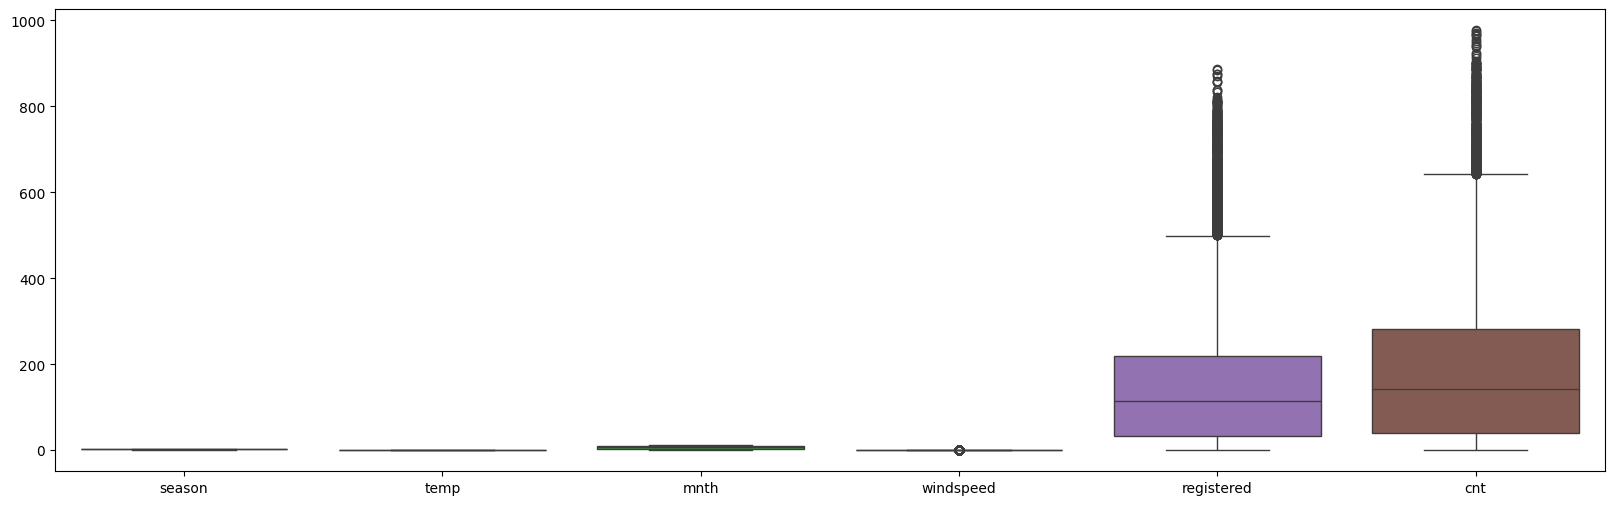

In [8]:

plt.figure(figsize=(20,6))
sea.boxplot(data=usedDat.select_dtypes(include='number'))
plt.show()

In [9]:
col = "registered"

Q1 = usedDat[col].quantile(0.25)
Q3 = usedDat[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outs = usedDat[(usedDat[col] < lower_bound) | (usedDat[col] > upper_bound)]

In [10]:
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

print("\nNumber of outliers:", outs.shape[0])
print(outs["registered"].describe())

Q1: 34.0
Q3: 220.0
IQR: 186.0
Lower bound: -245.0
Upper bound: 499.0

Number of outliers: 680
count    680.000000
mean     630.407353
std       92.822159
min      500.000000
25%      544.750000
50%      621.500000
75%      701.250000
max      886.000000
Name: registered, dtype: float64


In [11]:
col = "cnt"

Q1 = usedDat[col].quantile(0.25)
Q3 = usedDat[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outs = usedDat[(usedDat[col] < lower_bound) | (usedDat[col] > upper_bound)]

In [12]:
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

print("\nNumber of outliers:", outs.shape[0])
print(outs["registered"].describe())

Q1: 40.0
Q3: 281.0
IQR: 241.0
Lower bound: -321.5
Upper bound: 642.5

Number of outliers: 505
count    505.000000
mean     638.132673
std      125.979560
min      288.000000
25%      594.000000
50%      662.000000
75%      727.000000
max      886.000000
Name: registered, dtype: float64


I believe it would benefit our model to include outliers as the outliers could provide helpful insight into days and times in which the choice of public transit is at maximum and/or minimum values. In theory this should provide dramatic insights into the importance of weather and seasons on bike rentals if there are extreme highs and lows during specific times of the day or year.